<a href="https://colab.research.google.com/github/vikiofficial/Heart-disease-predictor/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODEL FOR PREDICTING CARDIOVASCULAR DISEASE USING MACHINE LEARNING ALGORITHMS**

IMPORTING LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

LOADING THE DATA:

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Content:** This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The **Cleveland database** is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has cardiovascular disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Attributes information:**
* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)




In [ ]:
dataframe=pd.read_csv("/content/heart.csv")

In [ ]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Our data has 3 types of data:
* Continuous: which is quantitative data that can be measured
* Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)
* Binary Data: data whose unit can take on only two possible states ( 0 &1 )

DATA ANALYSIS

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataframe.shape

(303, 14)

In [ ]:
dataframe.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
categorical_val = []
continous_val = []
for column in dataframe.columns:
    print('==============================')
    print(f"{column} : {dataframe[column].unique()}")
    if len(dataframe[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
dataframe.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
pd.set_option("display.float","{:.2f}".format)
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


The features described in the above data set are:

1. Count: tells us the number of NoN-empty rows in a feature.

2. Mean: tells us the mean value of that feature.

3. Std: tells us the Standard Deviation Value of that feature.

4. Min: tells us the minimum value of that feature.

5. 25%, 50%, and 75%: are the percentile/quartile of each features.

6. Max: tells us the maximum value of that feature.

In [ ]:
#Checking for null values
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there are no null values and duplicates, our data is good to go for analysis and visualizations

In [ ]:
dataframe.target.value_counts()

1    165
0    138
Name: target, dtype: int64

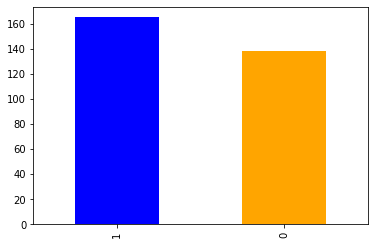

In [ ]:
dataframe.target.value_counts().plot(kind="bar",color=["blue","orange"])

In [ ]:
correlation=dataframe.corr()
pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False)


,target
target,1.00
cp,0.43
thalach,0.42
slope,0.35
restecg,0.14
fbs,-0.03
chol,-0.09
trestbps,-0.14
age,-0.23
sex,-0.28


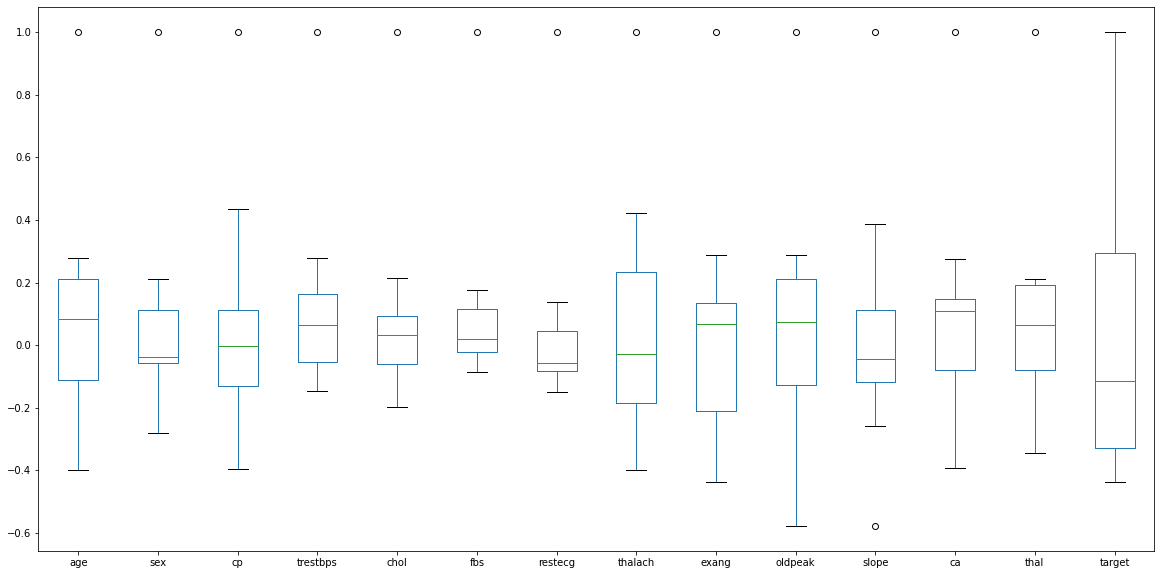

In [ ]:
correlation.plot(kind="box",figsize=(20,10))

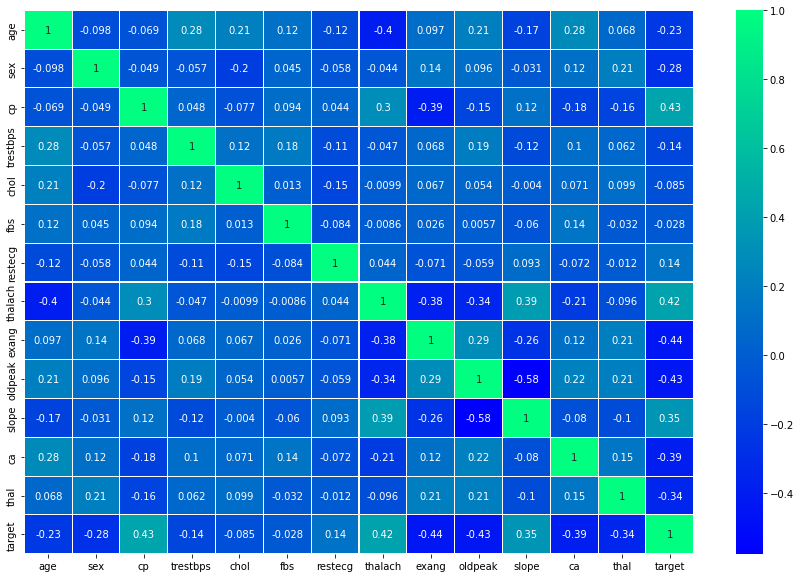

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

From the above heatmap, we can understand that Chest pain(cp) and target have positive correlation. It means that whose has large risk of chest pain results in greater chance to have heart disease.
In addition to chest pain, thalach,slope and restecg have positive correlation with target.

Then, exercise induced angina(exang) and target has negative correlation which means when we exercise, heart requires more blood, but narrowed arteries slow down the blood flow.
In addition to ca,oldpeak,thal have negative correlation with target.

Now, we can find the relationship between target with each features with the help of histogram.

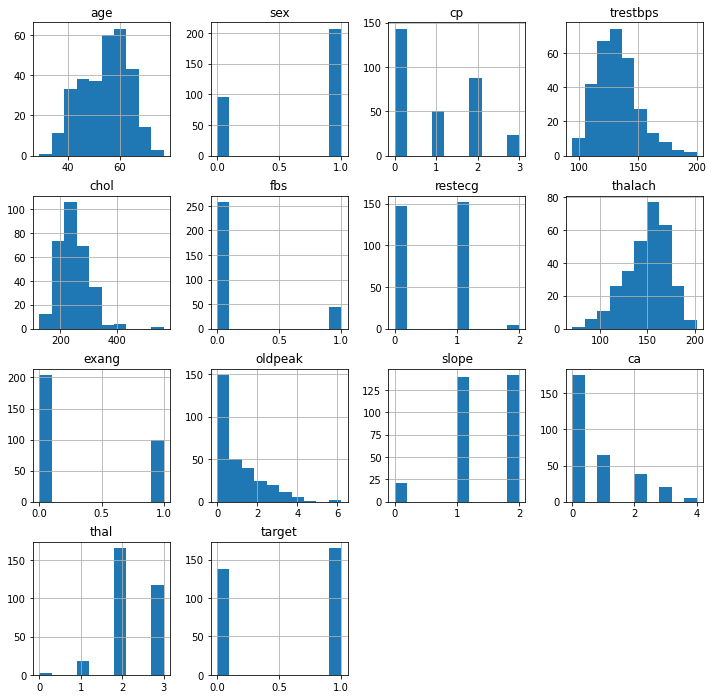

In [ ]:

dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

Now, we shall find relationship between target and mostly risk factors/features which cause cardiovascular disease.

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

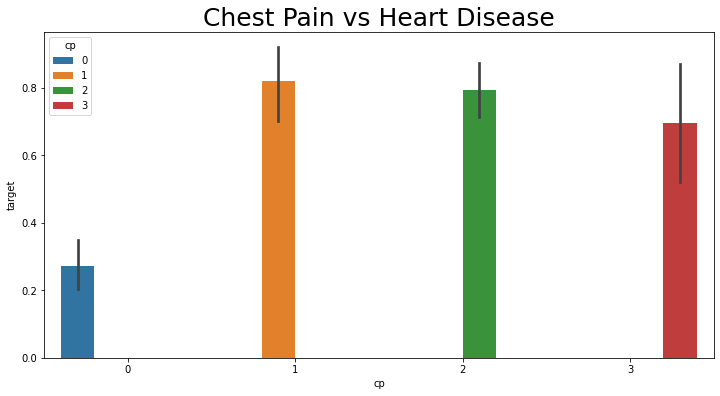

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='target',x='cp',hue='cp',ax=ax,data=dataframe)
plt.title('Chest Pain vs Heart Disease',size=25)

Text(0.5, 1.0, 'Gender vs target')

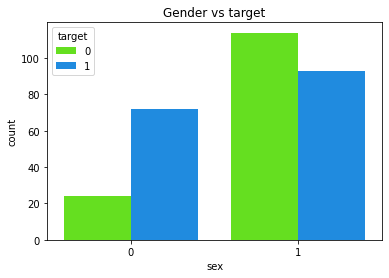

In [ ]:
sns.countplot(data=dataframe,x='sex',hue='target',palette='gist_rainbow')
plt.title('Gender vs target')

According to this dataset, males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women and Sudden Heart Attacks are experienced by men between 70-90%.

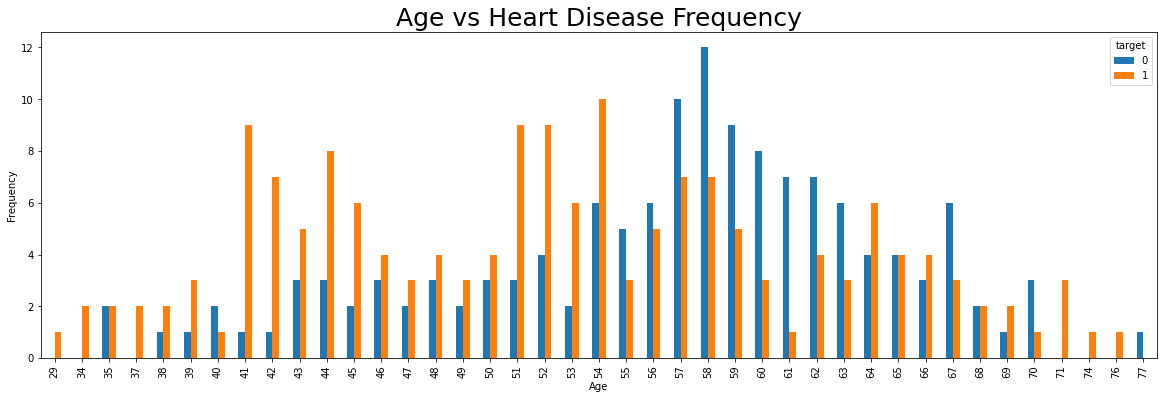

In [ ]:
pd.crosstab(dataframe.age,dataframe.target).plot(kind="bar",figsize=(20,6))
plt.title('Age vs Heart Disease Frequency',size=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the above analysis, frequency of Heart Disease is very common in the seniors and adults which belong to the age group of 41 to 60. But it’s very rare among the age group of 19 to 30.

## **Feature** **selection**

In [ ]:
from sklearn.feature_selection import chi2
X = dataframe.drop('target',axis=1)
y = dataframe['target']
chi_scores = chi2(X,y)
chi_scores

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

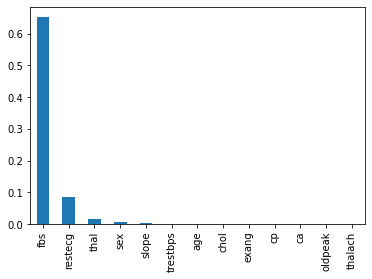

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
from sklearn.feature_selection import SelectKBest
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[1.50e+02 2.30e+00]
 [1.87e+02 3.50e+00]
 [1.72e+02 1.40e+00]
 [1.78e+02 8.00e-01]
 [1.63e+02 6.00e-01]
 [1.48e+02 4.00e-01]
 [1.53e+02 1.30e+00]
 [1.73e+02 0.00e+00]
 [1.62e+02 5.00e-01]
 [1.74e+02 1.60e+00]
 [1.60e+02 1.20e+00]
 [1.39e+02 2.00e-01]
 [1.71e+02 6.00e-01]
 [1.44e+02 1.80e+00]
 [1.62e+02 1.00e+00]
 [1.58e+02 1.60e+00]
 [1.72e+02 0.00e+00]
 [1.14e+02 2.60e+00]
 [1.71e+02 1.50e+00]
 [1.51e+02 1.80e+00]
 [1.61e+02 5.00e-01]
 [1.79e+02 4.00e-01]
 [1.78e+02 0.00e+00]
 [1.37e+02 1.00e+00]
 [1.78e+02 1.40e+00]
 [1.62e+02 4.00e-01]
 [1.57e+02 1.60e+00]
 [1.23e+02 6.00e-01]
 [1.57e+02 8.00e-01]
 [1.52e+02 1.20e+00]
 [1.68e+02 0.00e+00]
 [1.40e+02 4.00e-01]
 [1.88e+02 0.00e+00]
 [1.52e+02 5.00e-01]
 [1.25e+02 1.40e+00]
 [1.60e+02 1.40e+00]
 [1.70e+02 0.00e+00]
 [1.65e+02 1.60e+00]
 [1.48e+02 8.00e-01]
 [1.51e+02 8.00e-01]
 [1.42e+02 1.50e+00]
 [1.80e+02 2.00e-01]
 [1.48e+02 3.00e+00]
 [1.43e+02 4.00e-01]
 [1.82e+02 0.00e+00]
 [1.72e+02 2.00e-01]
 [1.80e+02 0.00e+00]
 [1.56e+02 0.

In [ ]:
df = dataframe.dropna()
df = df.drop(columns = [ 'slope', 'thal', 'fbs', 'restecg', 'exang','sex'])

df.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca,target
0,63,3,145,233,150,2.30,0,1
1,37,2,130,250,187,3.50,0,1
2,41,1,130,204,172,1.40,0,1
3,56,1,120,236,178,0.80,0,1
4,57,0,120,354,163,0.60,0,1


In [ ]:
correlat=df.corr()
pd.DataFrame(correlat['target']).sort_values(by='target',ascending=False)

,target
target,1.00
cp,0.43
thalach,0.42
chol,-0.09
trestbps,-0.14
age,-0.23
ca,-0.39
oldpeak,-0.43


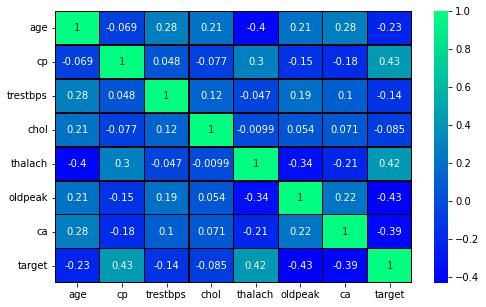

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),linewidths=0.3, linecolor='black',annot_kws={"size": 10},annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

In [ ]:

dataset = pd.get_dummies(dataframe, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,63,145,233,150,2.30,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
1,37,130,250,187,3.50,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.40,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,56,120,236,178,0.80,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
4,57,120,354,163,0.60,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
dataset = pd.get_dummies(dataframe, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:

X= df.drop(['target'], axis=1)
y= df['target']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [ ]:
print('X_train-', X_train.shape)
print('X_test-',X_test.shape)
print('y_train-', y_train.shape)
print('y_test-', y_test.shape)

X_train- (227, 7)
X_test- (76, 7)
y_train- (227,)
y_test- (76,)


In [ ]:
X_test.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca
18,43,0,150,247,171,1.50,0
112,64,2,140,313,133,0.20,0
102,63,1,140,195,179,0.00,2
275,52,0,125,212,168,1.00,2
92,52,2,138,223,169,0.00,4


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Testing Accuracy for Logistic Regression: 0.8157894736842105
Testing Sensitivity for Logistic Regression: 0.7631578947368421
Testing Specificity for Logistic Regression: 0.868421052631579
Testing Precision for Logistic Regression: 0.8529411764705882


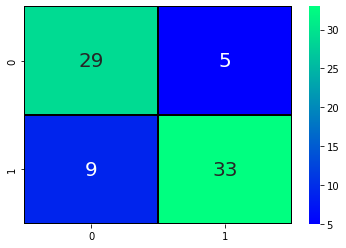

In [ ]:
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8026315789473685
Testing Sensitivity for Logistic Regression: 0.7567567567567568
Testing Specificity for Logistic Regression: 0.8461538461538461
Testing Precision for Logistic Regression: 0.8235294117647058
Testing Accuracy for Logistic Regression: 0.8026315789473685
Testing Sensitivity for Logistic Regression: 0.7567567567567568
Testing Specificity for Logistic Regression: 0.8461538461538461
Testing Precision for Logistic Regression: 0.8235294117647058


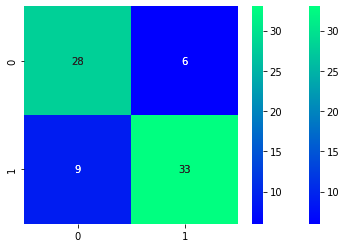

In [ ]:

for c in range(4,6):
  lr=LogisticRegression(C=c)
  model1=lr.fit(X_train,y_train)
  prediction1=model1.predict(X_test)
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,prediction1)
  cm
  sns.heatmap(cm, annot=True,cmap='winter')
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
  print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
  print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.85      0.79      0.81        42

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [ ]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_test,model1.predict(X_test) ) * 100
train_score = accuracy_score(y_train, model1.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Logistic Regression', 'Training Results %', 'Testing Results %'])
results_df

,Logistic Regression,Training Results %,Testing Results %
0,Logistic Regression,79.74,80.26


randomized search cv for dt:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={
    'criterion':('gini','entropy'),
    'max_depth':(3,5,7,9,10),
    'max_features':('auto','sqrt','log2'),
    'min_samples_split': (2,4,6)
}
dt_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv=10, verbose=True)
dt_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       min_samples_split=6)

In [ ]:
!pip install graphviz

In [ ]:
!pip install pyparsing
!pip install pydotplus

k-fold implementation

In [ ]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 272, Test set:31
Fold:2, Train set: 272, Test set:31
Fold:3, Train set: 272, Test set:31
Fold:4, Train set: 273, Test set:30
Fold:5, Train set: 273, Test set:30
Fold:6, Train set: 273, Test set:30
Fold:7, Train set: 273, Test set:30
Fold:8, Train set: 273, Test set:30
Fold:9, Train set: 273, Test set:30
Fold:10, Train set: 273, Test set:30


In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [ ]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.35483871 -0.22580645 -0.35483871 -0.4        -0.26666667 -0.33333333
 -0.33333333 -0.26666667 -0.2        -0.2       ]
rmse= 0.54


In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.43
For max depth: 2
rmse= 0.41
For max depth: 3
rmse= 0.42
For max depth: 4
rmse= 0.43
For max depth: 5
rmse= 0.46
For max depth: 6
rmse= 0.49
For max depth: 7
rmse= 0.50
For max depth: 8
rmse= 0.53
For max depth: 9
rmse= 0.53
For max depth: 10
rmse= 0.54


In [ ]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.64516129 0.77419355 0.64516129 0.6        0.73333333 0.66666667
 0.66666667 0.73333333 0.83333333 0.8       ]
Average score: 0.71


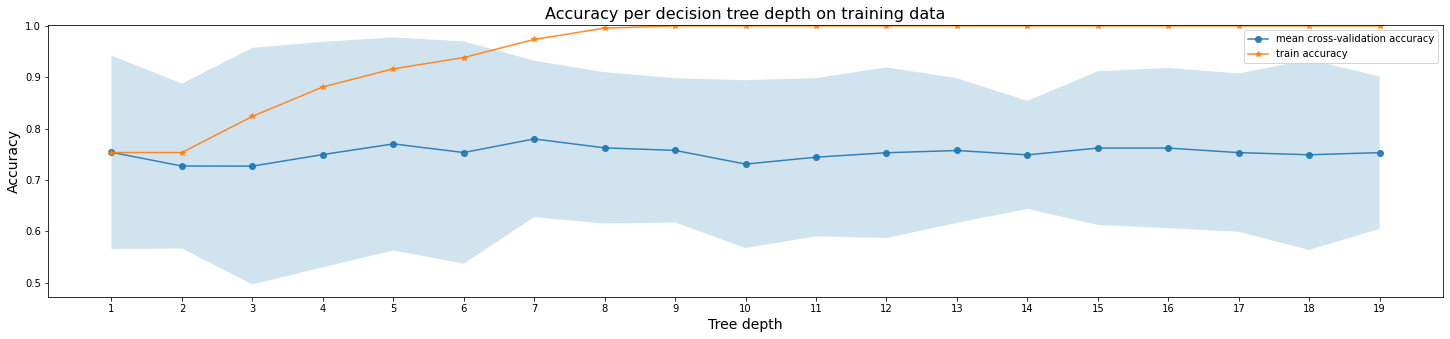

In [ ]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(25,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

sm_tree_depths = range(1,20)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.91      0.95      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



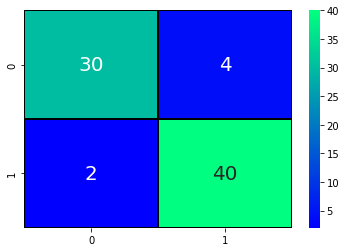

In [ ]:

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))



In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

Testing Accuracy for Decision Tree: 0.9210526315789473
Testing Sensitivity for Decision Tree: 0.9375
Testing Specificity for Decision Tree: 0.9090909090909091
Testing Precision for Decision Tree: 0.8823529411764706


In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5)))


The depth-7 tree achieves the best mean cross-validation accuracy 77.98419 on training dataset


In [ ]:
predictiontree=tree_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        34
           1       0.75      0.71      0.73        42

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76



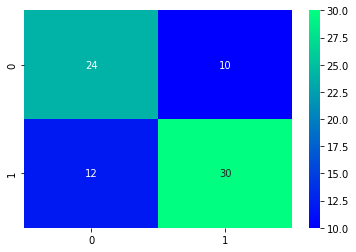

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtclas=DecisionTreeClassifier()
modeldt=dtclas.fit(X_train,y_train)
predictiondt=modeldt.predict(X_test)
cmdt= confusion_matrix(y_test,predictiondt)
sns.heatmap(cmdt, annot=True,cmap='winter')
print(classification_report(y_test, predictiondt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
rfc1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                              
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False)
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8026315789473685


80.26
Testing Accuracy for Random Forest: 0.8026315789473685
Testing Sensitivity for Random Forest: 0.7714285714285715
Testing Specificity for Random Forest: 0.8292682926829268
Testing Precision for Random Forest: 0.7941176470588235


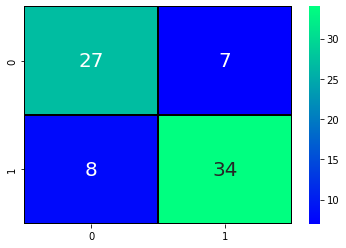

In [ ]:

rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        34
           1       0.83      0.81      0.82        42

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



SVM ALGORITHM


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
from sklearn.svm import SVC
for temp in range(1,100,5):
  svm=SVC(C=temp,kernel='linear')
 


In [ ]:
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))


In [ ]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        34
           1       0.85      0.81      0.83        42

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.82      0.82      0.82        76



PREDICTION MODEL:

In [ ]:
input=(63,1,3,145,200,150,98)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
print(pre1)
a1 = accuracy_score(pre1,model1.predict(input_reshaped)) * 100
print(a1)


[0]
100.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pickle
pickle.dump(model4, open('heart_disease_detector.pkl', 'wb'))


In [ ]:
from flask import Flask, request, render_template
mod = pickle.load(open('heart_disease_detector.pkl', 'rb')) 

app = Flask(__name__,template_folder='home')

@app.route('/')
@app.route('/home')
def home():
    return render_template('home.html')

@app.route('/predict', methods =['POST'])
def predict():
    
    features = [float(i) for i in request.form.values()]
    array_features = [np.array(features)]

    prediction = mod.predict(array_features)
    
    output = prediction

    if output == 1:
        return render_template('home.html', 
                               result = 'The patient is not likely to have heart disease!')
    else:
        return render_template('home.html', 
                               result = 'The patient is likely to have heart disease!')

if __name__ == '__main__':

    app.run()
  

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
